# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
city_df = pd.DataFrame(cities)
city_df = city_df.rename(columns={0: "City"})
city_df[['Lat', 'Lng', "Country", "Max Temp", 
                        "Humidity", "Cloudiness", "Wind Speed", "Date"]]=""

url = 'https://api.openweathermap.org/data/2.5/weather?'
params = {'appid': weather_api_key, "units": "imperial"}

response = requests.get(url, params).json()
response

print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in city_df.iterrows():
    city = row['City']
    params['q'] = city
    print(f"Processing Record {index}: | {city}")
    try:
        response = requests.get(url, params).json()
        row['Lat'] = response['coord']['lat']
        row['Lng'] = response['coord']['lon']
        row['Country']=response['sys']['country']
        row['Max Temp']=response['main']['temp_max']
        row['Humidity']=response['main']['humidity']
        row['Cloudiness']=response['clouds']['all']
        row['Wind Speed']=response['wind']['speed']
        row['Date']=response['dt']
                   
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0: | illoqqortoormiut
City not found. Skipping...
Processing Record 1: | la tuque
Processing Record 2: | tsihombe
City not found. Skipping...
Processing Record 3: | hualmay
Processing Record 4: | rawson
Processing Record 5: | jamestown
Processing Record 6: | ushuaia
Processing Record 7: | aswan
Processing Record 8: | waiuku
Processing Record 9: | rio grande
Processing Record 10: | pacific grove
Processing Record 11: | owase
Processing Record 12: | bull savanna
Processing Record 13: | qaanaaq
Processing Record 14: | hermanus
Processing Record 15: | pevek
Processing Record 16: | itoman
Processing Record 17: | belle fourche
Processing Record 18: | yerbogachen
Processing Record 19: | sao filipe
Processing Record 20: | puerto ayora
Processing Record 21: | nizhneyansk
City not found. Skipping...
Processing Record 22: | hithadhoo
Processing Record 23: | port alfred
Processing Record 24: | tumannyy
City not found. Skippin

Processing Record 226: | cap malheureux
Processing Record 227: | bembereke
Processing Record 228: | morococha
Processing Record 229: | plettenberg bay
Processing Record 230: | lagos
Processing Record 231: | san diego de la union
Processing Record 232: | port elizabeth
Processing Record 233: | clyde river
Processing Record 234: | jishu
Processing Record 235: | caravelas
Processing Record 236: | dikson
Processing Record 237: | bubaque
Processing Record 238: | pangnirtung
Processing Record 239: | kamina
Processing Record 240: | orel-izumrud
Processing Record 241: | rocha
Processing Record 242: | beringovskiy
Processing Record 243: | college
Processing Record 244: | uray
Processing Record 245: | kambove
Processing Record 246: | ambilobe
Processing Record 247: | clifton
Processing Record 248: | hervey bay
Processing Record 249: | petatlan
Processing Record 250: | valleyview
Processing Record 251: | chunhuhub
Processing Record 252: | cilegon
Processing Record 253: | halalo
City not found. Sk

Processing Record 454: | labytnangi
Processing Record 455: | portland
Processing Record 456: | longlac
City not found. Skipping...
Processing Record 457: | ilhabela
Processing Record 458: | kamakwie
Processing Record 459: | hofn
Processing Record 460: | chokurdakh
Processing Record 461: | northam
Processing Record 462: | vaitupu
City not found. Skipping...
Processing Record 463: | belen
Processing Record 464: | shingu
Processing Record 465: | san pedro buenavista
Processing Record 466: | zhoukou
Processing Record 467: | hammerfest
Processing Record 468: | ketchikan
Processing Record 469: | severo-kurilsk
Processing Record 470: | amarante do maranhao
Processing Record 471: | mizdah
Processing Record 472: | putina
Processing Record 473: | amderma
City not found. Skipping...
Processing Record 474: | ixtapa
Processing Record 475: | ugoofaaru
Processing Record 476: | marcona
City not found. Skipping...
Processing Record 477: | eureka
Processing Record 478: | la massana
Processing Record 479

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
city_df.to_csv(output_data_file)
city_df.head()

,City,Lat,Lng,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,illoqqortoormiut,,,,,,,,
1,la tuque,47.4334,-72.7824,CA,52.05,28,67,2.3,1649708996
2,tsihombe,,,,,,,,
3,hualmay,-11.0964,-77.6139,PE,71.89,75,86,9.73,1649708996
4,rawson,-43.3002,-65.1023,AR,63.28,39,55,24.96,1649708997


In [63]:
city_df['Humidity'] = pd.to_numeric(city_df['Humidity'])
city_df['Lat'] = pd.to_numeric(city_df['Lat'])
city_df['Lng'] = pd.to_numeric(city_df['Lng'])
city_df['Max Temp'] = pd.to_numeric(city_df['Max Temp'])
city_df['Cloudiness'] = pd.to_numeric(city_df['Cloudiness'])
city_df['Wind Speed'] = pd.to_numeric(city_df['Wind Speed'])
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,20.488391,13.430525,59.462316,70.975986,59.169811,8.844357
std,32.711841,89.162529,23.309806,22.234832,39.325896,6.080594
min,-54.800000,-175.200000,-21.600000,4.000000,0.000000,0.000000
25%,-5.842050,-64.859500,44.400000,60.000000,20.000000,4.105000
50%,23.051200,17.598800,66.180000,77.000000,75.000000,7.610000
75%,47.428450,88.281950,78.475000,87.000000,100.000000,12.270000
max,78.218600,179.316700,98.290000,100.000000,100.000000,37.330000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [64]:
print(f"Starting no. of cities: {len(city_df)}")
clean_city_df = city_df[city_df["Humidity"] <= 100]
print(f"No. of cities with humidity <=100: {len(clean_city_df)}")
clean_city_df.head()

Starting no. of cities: 633
No. of cities with humidity <=100: 583


,City,Lat,Lng,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
1,la tuque,47.4334,-72.7824,CA,52.05,28.0,67.0,2.30,1649708996
3,hualmay,-11.0964,-77.6139,PE,71.89,75.0,86.0,9.73,1649708996
4,rawson,-43.3002,-65.1023,AR,63.28,39.0,55.0,24.96,1649708997
5,jamestown,42.0970,-79.2353,US,58.59,47.0,100.0,1.01,1649708997
6,ushuaia,-54.8000,-68.3000,AR,46.02,70.0,20.0,20.71,1649708740


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

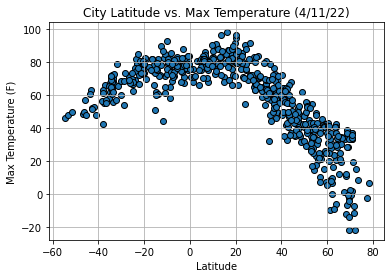

<Figure size 432x288 with 0 Axes>

In [65]:
plt.scatter(clean_city_df['Lat'], clean_city_df['Max Temp'], edgecolors='black')
plt.title("City Latitude vs. Max Temperature (4/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
plt.savefig('output_images/LatVTemp.png')

## Latitude vs. Humidity Plot

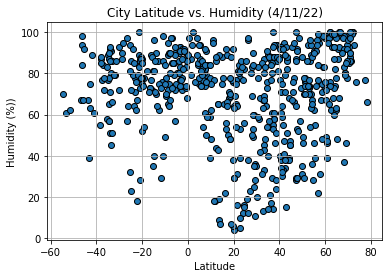

<Figure size 432x288 with 0 Axes>

In [66]:
plt.scatter(clean_city_df['Lat'], clean_city_df['Humidity'], edgecolors='black')
plt.title("City Latitude vs. Humidity (4/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid()
plt.show()
plt.savefig('output_images/LatVHum.png')

## Latitude vs. Cloudiness Plot

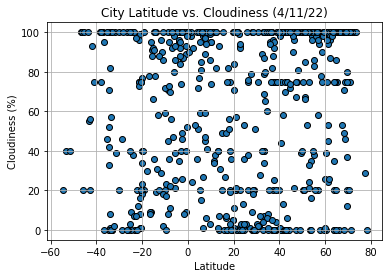

<Figure size 432x288 with 0 Axes>

In [67]:
plt.scatter(clean_city_df['Lat'], clean_city_df['Cloudiness'], edgecolors='black')
plt.title("City Latitude vs. Cloudiness (4/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
plt.savefig('output_images/LatVCloud.png')

## Latitude vs. Wind Speed Plot

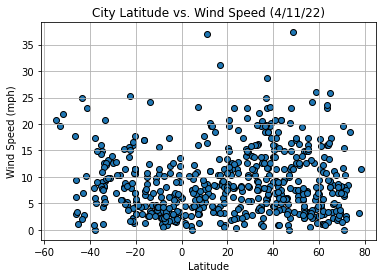

<Figure size 432x288 with 0 Axes>

In [68]:
plt.scatter(clean_city_df['Lat'], clean_city_df['Wind Speed'], edgecolors='black')
plt.title("City Latitude vs. Wind Speed (4/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()
plt.savefig('output_images/LatVWind.png')

## Linear Regression

In [69]:
north_city_df = clean_city_df[clean_city_df['Lat'] >= 0]
south_city_df = clean_city_df[clean_city_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.876974375364698


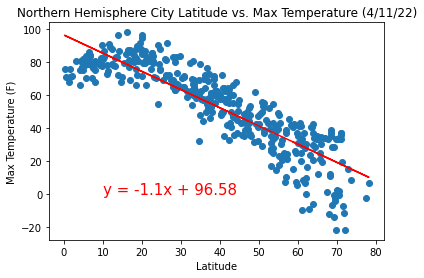

<Figure size 432x288 with 0 Axes>

In [70]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(north_city_df['Lat'], north_city_df['Max Temp'])
# Create equation of line
fit = slope * north_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(north_city_df['Lat'], north_city_df['Max Temp'])
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (4/11/22)")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(north_city_df['Lat'],fit, 'r')
plt.show()
plt.savefig('output_images/NorthLatVTemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7049677832612713


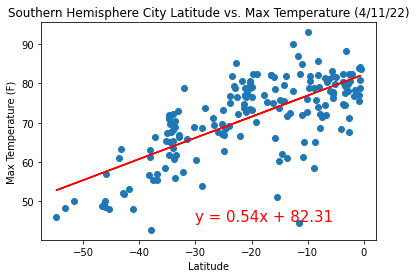

<Figure size 432x288 with 0 Axes>

In [71]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(south_city_df['Lat'], south_city_df['Max Temp'])
# Create equation of line
fit = slope * south_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(south_city_df['Lat'], south_city_df['Max Temp'])
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (4/11/22)")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(south_city_df['Lat'],fit, 'r')
plt.show()
plt.savefig('output_images/SouthLatVTemp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.19523822062758583


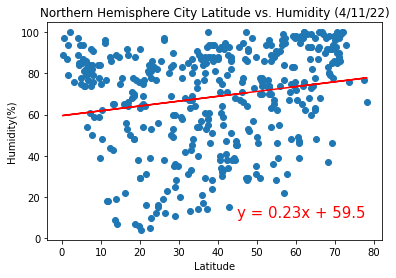

<Figure size 432x288 with 0 Axes>

In [72]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(north_city_df['Lat'], north_city_df['Humidity'])
# Create equation of line
fit = slope * north_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(north_city_df['Lat'], north_city_df['Humidity'])
plt.title("Northern Hemisphere City Latitude vs. Humidity (4/11/22)")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.plot(north_city_df['Lat'],fit, 'r')
plt.show()
plt.savefig('output_images/NorthLatVHumid.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.14039610809156794


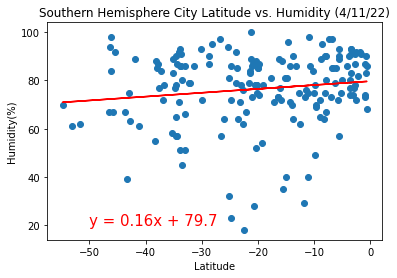

<Figure size 432x288 with 0 Axes>

In [73]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(south_city_df['Lat'], south_city_df['Humidity'])
# Create equation of line
fit = slope * south_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(south_city_df['Lat'], south_city_df['Humidity'])
plt.title("Southern Hemisphere City Latitude vs. Humidity (4/11/22)")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.plot(south_city_df['Lat'],fit, 'r')
plt.show()
plt.savefig('output_images/SouthLatVHumid.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.14647367163870922


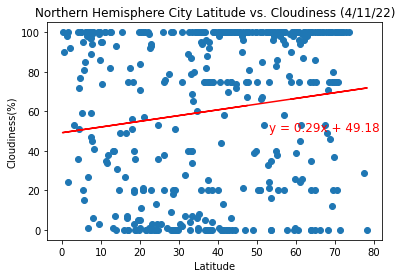

<Figure size 432x288 with 0 Axes>

In [74]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(north_city_df['Lat'], north_city_df['Cloudiness'])
# Create equation of line
fit = slope * north_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(north_city_df['Lat'], north_city_df['Cloudiness'])
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (4/11/22)")
plt.annotate(line_eq,(53,50),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.plot(north_city_df['Lat'],fit, 'r')
plt.show()
plt.savefig('output_images/NorthLatVCloud.png')

The r-value is 0.09283582129889008


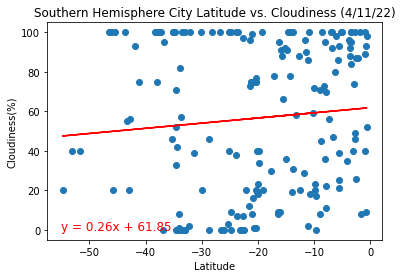

<Figure size 432x288 with 0 Axes>

In [75]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(south_city_df['Lat'], south_city_df['Cloudiness'])
# Create equation of line
fit = slope * south_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(south_city_df['Lat'], south_city_df['Cloudiness'])
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (4/11/22)")
plt.annotate(line_eq,(-55,0),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.plot(south_city_df['Lat'],fit, 'r')
plt.show()
plt.savefig('output_images/SouthLatVCloud.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.002945516185304376


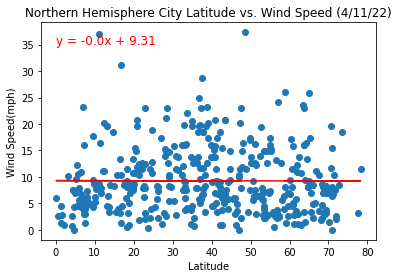

<Figure size 432x288 with 0 Axes>

In [76]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(north_city_df['Lat'], north_city_df['Wind Speed'])
# Create equation of line
fit = slope * north_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(north_city_df['Lat'], north_city_df['Wind Speed'])
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (4/11/22)")
plt.annotate(line_eq,(0,35),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.plot(north_city_df['Lat'],fit, 'r')
plt.show()
plt.savefig('output_images/NorthLatVWind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.3528425302044069


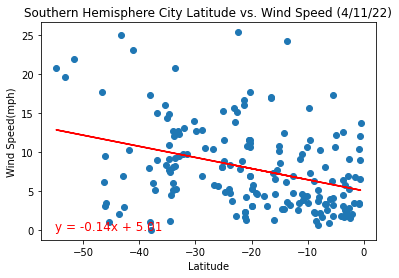

<Figure size 432x288 with 0 Axes>

In [77]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(south_city_df['Lat'], south_city_df['Wind Speed'])
# Create equation of line
fit = slope * south_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(south_city_df['Lat'], south_city_df['Wind Speed'])
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (4/11/22)")
plt.annotate(line_eq,(-55,0),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.plot(south_city_df['Lat'],fit, 'r')
plt.show()
plt.savefig('output_images/SouthLatVWind.png')